# "Sentiment Analysis of Amazon Fine Food Reviews: Leveraging Customer Feedback to Improve Customer Satisfaction"

Group 9 Members

Daniel Ogando

Joel Kioko

Humphrey Matagaro

Lydia Mangoa

Christine Ambasa

Bryan njogu


# 1 Business Understanding

## 1.1 Introduction
The Amazon Fine Food Reviews Dataset contains over 500,000 reviews with textual data, ratings, timestamps, and product metadata. This dataset is ideal for sentiment analysis due to its rich textual content and structured ratings.

## 1.2 Problem Statement
The rapid growth of e-marketplaces like Amazon has led to an enormous amount of customer-generated content,such as product reviews, ratings, and feedback. These reviews contain important information regarding customer feedback, likes, and dislikes that can directly affect business decisions like product improvements, marketing campaigns, and customer reach programs. However, it is not possible to manually analyze millions of reviews due to the vast amount of data and the unstructured nature of textual data.

For food business firms, understanding customer sentiment regarding their products is critical to maintaining competitive advantage, product quality improvement, and customer satisfaction. The Amazon Fine Food Reviews Dataset, which comprises over 500,000 food product reviews, presents an opportunity to leverage cutting-edge Natural Language Processing (NLP) techniques to extract actionable insights from this unstructured text data.

## 1.3 Stakeholders
1. E-commerce Sites: Amazon and other online shopping websites can use this model to measure customer satisfaction and improve the quality of the products.
2. Product Manufacturers: Food businesses can employ sentiment analysis to identify areas of improvement in their products.
3. Marketing Teams: Direct marketing campaigns and customer interaction policies can be informed through sentiment insights.
4. Data Scientists: The project can be referenced for deploying sophisticated NLP techniques like BERT and text classification pipelines.

## 1.4 Business Impact
1. Improved Product Quality: Finding negative comments informs restaurant owners of repeated problems in their products.
2. Improved Customer Experience: Through customer sentiment analysis, organizations are able to customize services as per customer requirements.
3. Data-Driven Decision Making: Sentiment analysis generates quantitative data for measuring customer satisfaction that enables more strategic decisions.
4. Competitive Advantage: Firms which can analyze customer comments effectively can stand apart in the marketplace

## 1.5 Objectives

1. Create a robust sentiment analysis model using advanced Natural Language Processing (NLP) techniques for classifying customer reviews as positive or negative.
2. Examine the performance of non-deep (Logistic Regression, Random Forest, Naive Bayes and XGboost) and deep learning models (TextCNN, DistilBERT).
3. Address challenges such as class imbalance, high-dimensional text data, and computational efficiency.
4. Provide actionable recommendations to businesses based on examining patterns in customer feedback.

## 1.6 Limitations
1. Sentiment Classification: Automatically classifying reviews as "positive" or "negative" from text content and matching ratings.
2. Class Imbalance: The dataset exhibits a skewed distribution of ratings, with a majority of positive reviews (70% of ratings are 4-5 stars), which may lead to biased model predictions.
3. High Dimensionality: Text data is inherently high-dimensional, and preprocessing and feature engineering must be effective processes transforming it into a state suitable for machine learning models.


## 1.7 Expected Outcomes
1. A scalable pipeline for preprocessing and modeling textual data.
2. A sentiment analysis model with high predictive accuracy and generalizability.
3. Insights into customer sentiment trends that can inform business decisions.
4. Recommendations for deploying the model in real-world applications, such as automated feedback systems or customer dashboards.

## 1.8 Data source
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?resource=download

Given the large size of the Amazon Food Reviews dataset, which contains over 500,000 entries, the group performed random sampling to select a subset of 7,000 reviews for analysis in order to make the data more manageable and efficient to work with.

In [ ]:
# Data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Text processing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

# Preprocessing and Model-related
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Phase 1 - A

In [2]:
df = pd.read_csv('reviews3.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran..."
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10556 entries, 0 to 10555
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10556 non-null  int64 
 1   ProductId               10556 non-null  object
 2   UserId                  10556 non-null  object
 3   ProfileName             10556 non-null  object
 4   HelpfulnessNumerator    10556 non-null  int64 
 5   HelpfulnessDenominator  10556 non-null  int64 
 6   Score                   10556 non-null  int64 
 7   Time                    10556 non-null  int64 
 8   Summary                 10555 non-null  object
 9   Text                    10556 non-null  object
dtypes: int64(5), object(5)
memory usage: 824.8+ KB


In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,10556.000000,10556.000000,10556.000000,10556.000000,1.055600e+04
mean,24916.887457,1.637647,2.114343,4.149204,1.294959e+09
std,14387.070744,5.524306,6.290436,1.329831,4.695672e+07
min,6.000000,0.000000,0.000000,1.000000,1.067645e+09
25%,12532.750000,0.000000,0.000000,4.000000,1.269130e+09
50%,24737.000000,0.000000,1.000000,5.000000,1.308269e+09
75%,37379.750000,2.000000,2.000000,5.000000,1.330387e+09
max,49997.000000,187.000000,216.000000,5.000000,1.351210e+09


In [6]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [7]:
df.duplicated().sum()

0

Phase 1 - B

Distro of ratings

In [10]:
#sns.barplot(df['Score'].value_counts())

In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran..."
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...


Phase 2 - 1.

Next we need to clean and prepare the data 

We shall map the sentiment analysis to 3 classes;  negative, neutral, positve

In [12]:
df['Sentiment'] = df['Score'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...,Positive
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...,Neutral
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran...",Positive
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...,Positive
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...,Negative


We shall do a len count for each review and create a new column for this.

In [13]:
def review_len(df1):
    df1['Review_len'] = df1['Text'].apply(lambda x: len(str(x)))
    return df1

review_len(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Review_len
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...,Positive,634
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...,Neutral,253
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran...",Positive,147
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...,Positive,418
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...,Negative,125


In [2]:
#initializing the stopwords and Lemmantization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()





In [16]:
def clean_and_tokenize(text):
    
    text = str(text)
    #removing htmls if present.
    text = re.sub(r"<.*?>", " ", text) 
    #Removing url links.
    text = re.sub(r"http\S+|www.\S+", " ", text)
    #removing non-alpha numeric characters.
    text = re.sub(r"[^a-zA-Z\s]", " ", text) 
    #changing text to lowercase and fixing spaces.
    text = re.sub(r"\s+", " ", text).strip().lower()
    
    #tokenizing and the lemmatizing after
    tokens = word_tokenize(text)                        
    tokens = [t for t in tokens if t not in stop_words] 
    tokens = [lemmatizer.lemmatize(t) for t in tokens] 
    
    return tokens

df['Tokens'] = df['Text'].apply(clean_and_tokenize)

print(df[['Text', 'Tokens']].head())

                                                Text  \
0  This is not an instant tea mix.  This actually...   
1  A friend's doctor recommended this to her for ...   
2  It's tasty although they say "a medley of oran...   
3  I'm diabetic and manage my weight and blood su...   
4  These were gross. It was like chomping down on...   

                                              Tokens  
0  [instant, tea, mix, actually, powdered, green,...  
1  [friend, doctor, recommended, weight, loss, ba...  
2  [tasty, although, say, medley, orange, mingled...  
3  [diabetic, manage, weight, blood, sugar, level...  
4  [gross, like, chomping, chunk, salt, regret, w...  


In [17]:
'''To be returned to take note'''
#df.to_csv('cleaned_reviews.csv', index=False)



'To be returned to take note'

We shall do a len count for each tokenized review and create a new column for this.

In [18]:
def token_len(df1):
    df1['Token_len'] = df1['Tokens'].apply(lambda x: len(str(x)))
    return df1

token_len(df)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Review_len,Tokens,Token_len
0,26249,B0007A0PX0,A239D6FZHF13QE,ABC MOM,1,1,5,1276560000,Very convenient!,This is not an instant tea mix. This actually...,Positive,634,"[instant, tea, mix, actually, powdered, green,...",570
1,38295,B007R1PGVS,A1K6BWET4KNSL,S. Mayo,4,5,3,1250208000,Zipfizz,A friend's doctor recommended this to her for ...,Neutral,253,"[friend, doctor, recommended, weight, loss, ba...",200
2,28573,B0089SPEO2,A2VQO4Y1SH3TTQ,Elesix,0,0,5,1328140800,Tasty,"It's tasty although they say ""a medley of oran...",Positive,147,"[tasty, although, say, medley, orange, mingled...",142
3,10132,B003EML8PM,A2ZX2OEW7WL6G4,Brian K Thornton,0,0,4,1320364800,Pork Rinds,I'm diabetic and manage my weight and blood su...,Positive,418,"[diabetic, manage, weight, blood, sugar, level...",390
4,49426,B000IHNCQO,A14WSF4X001KBM,tonid,0,0,1,1336348800,Gross,These were gross. It was like chomping down on...,Negative,125,"[gross, like, chomping, chunk, salt, regret, w...",98


We shall vectorize the text using tfidf

In [ ]:

# create the vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # adjust max_features as needed

tfidf_matrix = vectorizer.fit_transform(df['Text'].astype(str))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(f"\nTF-IDF matrix shape: {tfidf_df.shape}")
print(tfidf_df)
print(tfidf_df.max())


TF-IDF matrix shape: (10556, 5000)
             00  000   0g   10  100  10th   11  110        12  120  ...  zero  \
0      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
1      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
2      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
3      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
4      0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
...         ...  ...  ...  ...  ...   ...  ...  ...       ...  ...  ...   ...   
10551  0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
10552  0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
10553  0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
10554  0.154121  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.000000  0.0  ...   0.0   
10555  0.000000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.062071  0.0  ...  

In [ ]:
MAX_SEQUENCE_LENGTH = 100  
MAX_VOCAB_SIZE = 10000     
embedding_dim = 100       

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])


X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])  
y = np.eye(len(label_encoder.classes_))[y]  


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 10% validation, 10% test


In [ ]:
MAX_SEQUENCE_LENGTH = 100  
MAX_VOCAB_SIZE = 10000     
embedding_dim = 100        

input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))


embedding_layer = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH)(input_layer)

conv_3 = Conv1D(filters=128, kernel_size=3, activation='relu')(embedding_layer)
conv_4 = Conv1D(filters=128, kernel_size=4, activation='relu')(embedding_layer)
conv_5 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)

pool_3 = GlobalMaxPooling1D()(conv_3)
pool_4 = GlobalMaxPooling1D()(conv_4)
pool_5 = GlobalMaxPooling1D()(conv_5)

concat = Concatenate()([pool_3, pool_4, pool_5])

dropout = Dropout(0.5)(concat)


output = Dense(3, activation='softmax')(dropout)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 100)  │  1,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 98, 128)   │     38,528 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 97, 128)   │     51,328 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 96, 128)   │     64,128 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 384)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │      1,155 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,155,139 (4.41 MB)

 Trainable params: 1,155,139 (4.41 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
#Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=64)


Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.7089 - loss: 0.7726 - val_accuracy: 0.8000 - val_loss: 0.5299
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - accuracy: 0.7908 - loss: 0.5436 - val_accuracy: 0.8615 - val_loss: 0.3991
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.8550 - loss: 0.3796 - val_accuracy: 0.8521 - val_loss: 0.3871
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.9039 - loss: 0.2591 - val_accuracy: 0.8521 - val_loss: 0.4177
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.9421 - loss: 0.1781 - val_accuracy: 0.8533 - val_loss: 0.4556


TextCNN Accuracy: 0.8191
TextCNN Loss: 0.5579
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

Additional Metrics:
Precision: 0.7836
Recall: 0.8191
F1-Score: 0.7919

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       167
           1       0.36      0.09      0.15        88
           2       0.86      0.95      0.90       801

    accuracy                           0.82      1056
   macro avg       0.63      0.53      0.55      1056
weighted avg       0.78      0.82      0.79      1056



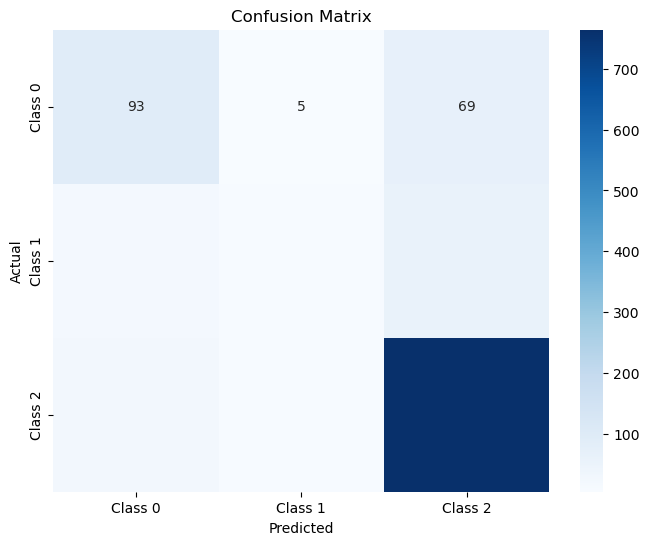

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)  
print(f"TextCNN Accuracy: {acc:.4f}")
print(f"TextCNN Loss: {loss:.4f}")

y_pred_probs = model.predict(X_test)  
y_pred = np.argmax(y_pred_probs, axis=1)   


y_true = np.argmax(y_test, axis=1)  


precision = precision_score(y_true, y_pred, average='weighted')  
recall = recall_score(y_true, y_pred, average='weighted')       
f1 = f1_score(y_true, y_pred, average='weighted')                

print("\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

TextCNN shows good overall performance with accuracy 0.82 and weighted F1-score 0.79, reflecting a generally consistent balance between precision (0.78) and recall (0.82). The classification report, however, shows that performance is quite different across classes. Class 2 is notable with high metrics—precision (0.86), recall (0.95), and F1-score (0.90)—implying the model performs extremely well in detecting and correctly classifying instances from this class. Class 1, however, exhibits strong weakness with low precision (0.36), very low recall (0.09), and resultant F1-score of merely 0.15, which represents the inability of the model to classify true occurrences of this class. Class 0 is moderately weak with lower balanced precision (0.65) and recall (0.56), with the resultant F1-score of 0.60. The macro averages—precision (0.63), recall (0.53), and F1-score (0.55)—show the disparity in class-wise performance. The relatively high loss value of 0.5346 also suggests that while the model is overall good, particularly for Class 2, there are some points for improvement, most importantly in enhancing recall for the poorly performing classes like Class 1, potentially through class rebalancing, improved feature representation, or model tuning.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.44      0.54       319
     Neutral       0.36      0.03      0.05       168
    Positive       0.84      0.98      0.90      1625

    accuracy                           0.82      2112
   macro avg       0.64      0.48      0.50      2112
weighted avg       0.78      0.82      0.78      2112



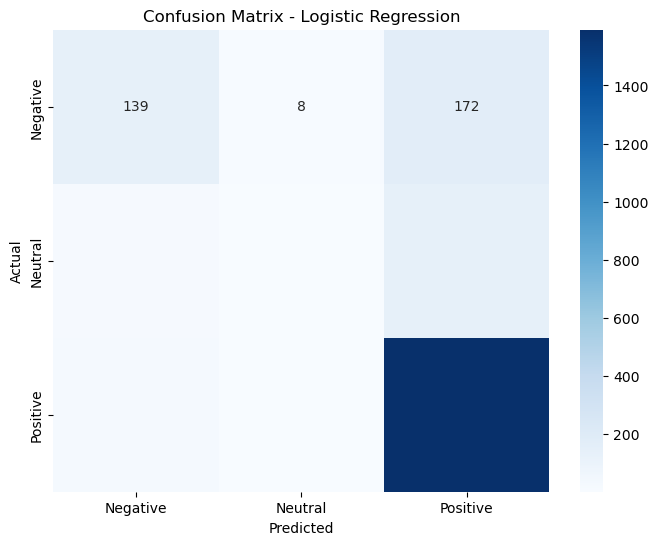

In [ ]:
# Encode the target labels
label_encoder = LabelEncoder()
df['Sentiment_Encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Train/test split
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    tfidf_df, df['Sentiment_Encoded'], test_size=0.2, random_state=42
)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_tfidf_train, y_tfidf_train)

# Predict
y_pred_logreg = logreg.predict(X_tfidf_test)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_tfidf_test, y_pred_logreg, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_tfidf_test, y_pred_logreg)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


The logistic regression model demonstrates excellent performance for the majority class (`Positive`), with high precision (0.84) and recall (0.98), reflecting its ability to accurately identify and predict this majority class, which is comprised of 1,625 samples. The model's performance significantly deteriorates for the minority classes. For `Negative`, the model possesses moderate precision (0.72) but low recall (0.43), reflecting a high false negative rate. The `Neutral` class performs the poorest, with ghastly accuracy (0.31), recall (0.02), and F1-score (0.04), likely due to its minimal size of only 168 cases compared to the dominating number of `Positive`. The macro average F1-score (0.49) and weighted average F1-score (0.78) are measures that indicate the overall bad performance of the model on all classes and hide these issues by assigning significant weight to the majority class. This imbalance reflects the need for techniques such as resampling, class weighting, or employing algorithms more suited to imbalanced data to improve the model's ability to handle minority classes better.